In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import htwt
import nb
import mcc
from sklearn.naive_bayes import BernoulliNB, GaussianNB

In [3]:
X, y = htwt.get()

In [63]:
reload(nb)
cl = BernoulliNB()
clf = nb.bernoulli()
clf.fit(1 * (X > 0), y)
y_hat = clf.predict(1 * (X > 0))
print '%0.3f' % np.mean(np.mean(y_hat != y))

0.348


In [5]:
import generative
reload(generative)
reload(nb)
clf = nb.gaussian()
clf.fit(X, y)
y_hat = clf.predict(X)
print '%0.3f' % np.mean(np.mean(y_hat != y))

0.124


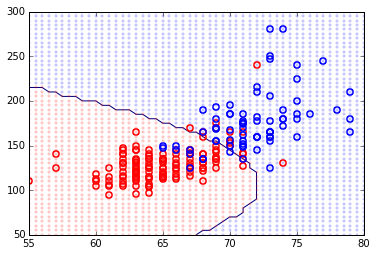

In [20]:
colors = ['r', 'b', 'g']

def classes(y):
    return range(len(np.unique(y)))
    
def limits(X):
    plt.plot(X[:, 0], X[:, 1], alpha = 0)
    axis = plt.gca()
    minx, maxx = axis.get_xlim()
    miny, maxy = axis.get_ylim()
    return minx, maxx, miny, maxy

def mesh(X):
    minx, maxx, miny, maxy = limits(X)
    gridx = np.linspace(minx, maxx, 51)
    gridy = np.linspace(miny, maxy, 51)
    meshx, meshy = np.meshgrid(gridx, gridy)
    return meshx, meshy, np.vstack([meshx.flatten(), meshy.flatten()]).T

def show_points(X, y):
    for c in classes(y):
        i = y == c
        color = colors[c]
        plt.plot(X[i, 0], X[i, 1], 'o', markeredgewidth = 1.5, markerfacecolor = 'none', markeredgecolor = color)

meshx, meshy, XX = mesh(X)
Z = clf.predict(XX)
plt.contour(meshx, meshy, Z.reshape(meshx.shape), levels = classes(y))

for c in classes(y):
    i = Z == c
    color = colors[c]
    plt.plot(XX[i, 0], XX[i, 1], 'o', alpha = 0.2, markersize = 2.5, markerfacecolor = color, markeredgecolor = color)

show_points(X, y)

plt.show()